In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os
import h5py
os.environ["HDF5_USE_FILE_LOCKING"]='FALSE'
from sklearn.metrics import auc

In [3]:
#you can definitely make this cleaner by reading the .csv file but I was running out of time
#data from sst_human.csv
hed_small_ac=[0.39687300701530615,0.6971486454636202,0.8321096696151287,0.9005868906665927,0.9403685981865573,0.962852498336291,0.97056188304126,0.9709665455856256,0.970108695652174,0.9694011860858474,0.9690797089895741,0.968970528088953,0.9689337011978705,0.9689267690771961,0.9689246027894853,0.9689237362744011,0.9689237362744011,0.9689237362744011]
hed_small_pr=[0.048975213838712325,0.09176624941916388,0.14900229418983088,0.2181052601478389,0.30470314926098446,0.4204737636629854,0.5500516269095338,0.659473719813299,0.7463520086470906,0.7887840670859538,0.8409090909090909,0.9354838709677419,0.96,1.0,1.0,0,0,0]
hed_small_sp=[0.37754726523216875,0.68798261825307,0.8288269959027335,0.902186982559676,0.9475386217569641,0.9771692417485666,0.9924006279822337,0.9977490297889123,0.9993704080140621,0.9998197971801612,0.9999624391144752,0.9999964227728072,0.9999995528466009,1.0,1.0,1.0,1.0,1.0]
hed_small_se=[0.9994283881941249,0.9829352963319252,0.9344598268434481,0.8506977846557084,0.7168151463186806,0.5164721792351555,0.28965382631366154,0.1359181340359976,0.05776067589610607,0.020982335801023325,0.006190137605085951,0.0016172431580855186,0.0003346020327073487,9.759225953964337e-05,2.788350272561239e-05,0.0,0.0,0.0]
hed_small_fs=[0.0933747631797125,0.1678610883602217,0.25702173675461454,0.34719523401737173,0.42762980059468114,0.46355502721641745,0.37947725072604066,0.22538434863021617,0.10722327182380496,0.040877300196917224,0.01228980693377621,0.003228904260205147,0.0006689708997658602,0.00019516547243984722,5.576545051513335e-05,0.0,0.0,0.0]

hed_ac=[0.44087247670807456,0.7057319106311003,0.8422119357253771,0.9126583123059007,0.9482885460570097,0.9647064073591393,0.9702581695042147,0.9710965228482697,0.970505992818323,0.9698400759760426,0.9693808229813664,0.9691459973935226,0.9690108210403726,0.9689540643023514,0.9689324014252441,0.9689276355922803,0.9689250360470275,0.9689237362744011]
hed_pr=[0.05261469361565608,0.09390434017610991,0.15638592096698772,0.23825359970331672,0.33409733736467373,0.43878295431676395,0.5366579385860509,0.6223827419591,0.694048884165781,0.7537796976241901,0.7828418230563002,0.8147239263803681,0.8054711246200608,0.7651515151515151,0.7,0.7647058823529411,1.0,0]
hed_sp=[0.4229659774393224,0.6969610113536719,0.8394647752674089,0.9155009750179868,0.9572588423466789,0.9800484624853949,0.9912961590864477,0.9965403741511352,0.9987126453639806,0.9995412206125197,0.9998189028733631,0.9999324798367354,0.9999713821824574,0.9999861382446278,0.9999932926990135,0.9999982113864035,1.0,1.0]
hed_se=[0.9991774366695945,0.9791989069666932,0.9278653784488408,0.8240272142986602,0.6686045701060968,0.4863579962914941,0.3143167844744657,0.17778521337850461,0.09105357815048726,0.04379104103057426,0.020354956989697047,0.009257322904903314,0.003694564111143642,0.0014081168876434258,0.00048796129769821685,0.00018124276771648055,4.1825254088418586e-05,0.0]
hed_fs=[0.09996540796286378,0.17137405464888875,0.26765950259000676,0.36963380581170285,0.4455541671118461,0.4613472105586818,0.3964409119283962,0.27656805760388653,0.16098697265119488,0.08277334176614752,0.03967822589411893,0.018306636155606407,0.007355390252026202,0.002811060549130937,0.0009752427657884838,0.00036239964317573593,8.364700961940611e-05,0.0]

cedn_small_ac=[0.4715046514529725,0.692597708240905,0.8146701870286158,0.8873894326752441,0.9325781943212067,0.958048971966504,0.9687123065938332,0.9708006079469832,0.9702486378382875,0.9694562097937001,0.9690636784605147,0.9689562305900621,0.9689328346827861,0.9689237362744011,0.9689237362744011,0.9689237362744011,0.9689237362744011,0.9689237362744011]
cedn_small_pr=[0.055431859069129515,0.09064839073657835,0.13843019689565383,0.2006763011480578,0.2832538407081475,0.38597336046955355,0.49549200014780326,0.5947672383619181,0.6889053619965406,0.7746982565936522,0.8443496801705757,0.8947368421052632,0.9565217391304348,0,0,0,0,0]
cedn_small_sp=[0.4546217551754652,0.6832347434613877,0.8103233410944258,0.887642423947032,0.9379780349307292,0.9697809261351772,0.987789582130677,0.9958584652175021,0.998874067741057,0.9997746346868518,0.9999673578018654,0.9999955284660089,0.9999995528466009,1.0,1.0,1.0,1.0,1.0]
cedn_small_se=[0.9978947955442162,0.9845246559872851,0.9502000641320563,0.8795014429712661,0.7642171009522216,0.59225953964337,0.37390382979909936,0.18952416802598743,0.07773920559900735,0.024161055111743136,0.0055209335396712534,0.0011850488658385267,0.0003067185299817363,0.0,0.0,0.0,0.0,0.0]
cedn_small_fs=[0.10502945772834325,0.16601155688876143,0.24165483300801852,0.32678898892468994,0.413314432639889,0.4673660122449653,0.42619564094618323,0.28745123330831124,0.13971260695806867,0.04686063490346655,0.010970136849686963,0.0023669627690679736,0.0006132404181184669,0.0,0.0,0.0,0.0,0.0]

cedn_ac=[0.4207714930401508,0.6426717086291038,0.7860699901563887,0.8781419836956522,0.9332072842724046,0.9581685510481367,0.9671075206577197,0.9688756446872228,0.9689514647570985,0.9689241695319432,0.9689237362744011,0.9689237362744011,0.9689237362744011,0.9689237362744011,0.9689237362744011,0.9689237362744011,0.9689237362744011,0.9689237362744011]
cedn_pr=[0.05088673378107828,0.07864606473114116,0.11896318231884581,0.17549380670220444,0.25018031067984703,0.3232865400495458,0.3920700308959835,0.48114169215086644,0.6185185185185185,1.0,0,0,0,0,0,0,0,0]
cedn_sp=[0.40221671826071637,0.6318599479781736,0.7818217834355601,0.880971789539204,0.9446804172298936,0.978746351787205,0.9947209069701825,0.9993171967595688,0.9999539431998923,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
cedn_se=[0.9992889706804969,0.9797705187725682,0.9185244050357606,0.7899117487138735,0.5754876127539141,0.3165753481952403,0.10615249487640638,0.019741519929733574,0.0023282724775886346,1.3941751362806195e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
cedn_fs=[0.09684198864123837,0.14560447529265513,0.21064461414752444,0.2871842179960261,0.3487495775599865,0.3198957489522065,0.1670707757797843,0.037926878264363195,0.004639082183979888,2.7883113986169977e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

In [18]:
# #data from chl_human.csv
# hed_small_ac=[0.22926732683562556,0.6006210313609139,0.8468304611246673,0.9334269458462733,0.9642315570929458,0.9750062389086069,0.9782864317602041,0.9790229695818545,0.9789289526952085,0.9786867617291481,0.9784718659882431,0.978362685087622,0.9783180595607809,0.9782885980479148,0.9782751670641082,0.978268668200976,0.9782665019132653,0.9782665019132653]
# hed_small_pr=[0.027380699824376842,0.04925855674538576,0.10373708478649894,0.18666287209048854,0.292961959300542,0.40315066024865504,0.5011745480543356,0.5899073120494336,0.6627634660421545,0.7264239028944911,0.7674943566591422,0.8100558659217877,0.8606060606060606,0.9473684210526315,1.0,1.0,0,0]
# hed_small_sp=[0.2121825581184207,0.5928710019296409,0.8480574932914307,0.9405115209352979,0.9755028160711589,0.9897308733252935,0.9956739194652808,0.998236440142378,0.9992984734268023,0.9997404705985519,0.9999087661148492,0.9999698839602416,0.9999898136924347,0.9999986713511871,1.0,1.0,1.0,1.0]
# hed_small_se=[0.9982855889799255,0.9494647449315232,0.7915993860016347,0.6145366106492833,0.4568905368498694,0.3122221557721827,0.1956422064071128,0.11418774794171002,0.0620576919243267,0.03101887845623268,0.0135558080657058,0.005781153439786297,0.002830771684309152,0.001076490640511931,0.00039870023722664115,9.967505930666029e-05,0.0,0.0]
# hed_small_fs=[0.0532995153476783,0.09365809917005961,0.18343542411559818,0.28634858414107967,0.35700767163830366,0.35190760796297127,0.28142519177001935,0.19133833280443605,0.11348888078745899,0.05949718000191186,0.026641070344179122,0.011480374497733616,0.005642982037831823,0.002150537634408602,0.0007970826774007134,0.00019933025035879446,0.0,0.0]

# hed_ac=[0.17637827889307897,0.567503691354259,0.8235229383873115,0.9244715124500887,0.9614647744287933,0.9738139141526175,0.977518699395519,0.9785481193156611,0.9787240218777729,0.9786555671861136,0.9784948286379769,0.9783917133429458,0.9783158932730701,0.9782868650177462,0.9782756003216504,0.9782673684283496,0.9782665019132653,0.9782665019132653]
# hed_pr=[0.02568597150786878,0.0459856643182506,0.0935648690783709,0.16956216268003704,0.2692380929712232,0.3728251454027967,0.4575838002555785,0.5321782178217822,0.6088659793814433,0.7031674208144797,0.7918050941306756,0.9070422535211268,0.9523809523809523,0.9607843137254902,1.0,1.0,0,0]
# hed_sp=[0.15810167972211753,0.5588469631295525,0.8236112409004165,0.9309009611888396,0.9728056589810238,0.9887769034776497,0.9951123439003726,0.9979073781197227,0.9991598510673257,0.9997094687929181,0.9999167380077265,0.9999853848630584,0.9999973427023743,0.9999991142341248,1.0,1.0,1.0,1.0]
# hed_se=[0.999043119430656,0.9571596595099974,0.8195482726312222,0.6350696728664553,0.45098977333891516,0.30030101867910614,0.18559496042900145,0.10715068875465981,0.05886809002651357,0.030979008432510016,0.014253533480852421,0.006419073819348923,0.002392201423359847,0.0009768155812052708,0.0004186352490879732,3.9870023722664115e-05,0.0,0.0]
# hed_fs=[0.050084248271561264,0.08775522699587214,0.16795492985366092,0.26765977289626575,0.33718114003383287,0.3326561257839413,0.26407976286715173,0.17838474685959876,0.1073564430225583,0.059343554885150744,0.02800297654016371,0.01274793143038125,0.004772415438763945,0.001951646951049508,0.0008369201339072215,7.973686833449617e-05,0.0,0.0]

# cedn_small_ac=[0.2727156929347826,0.6517224586845608,0.8513805318322981,0.9309560780834073,0.9617273284993345,0.973841642635315,0.9779315938331854,0.9787266214230257,0.9785758477983585,0.9783466545585625,0.9782764668367347,0.9782678016858918,0.9782665019132653,0.9782665019132653,0.9782665019132653,0.9782665019132653,0.9782665019132653,0.9782665019132653]
# cedn_small_pr=[0.02897076833277509,0.055811267157397204,0.10883426962540303,0.18414064805012237,0.27337275296240887,0.37149256360570754,0.47721511525084004,0.5839392981346823,0.7003367003367004,0.7899686520376176,0.7804878048780488,1.0,0,0,0,0,0,0]
# cedn_small_sp=[0.25659485910343666,0.6452308372303341,0.8522511518278,0.937541547955586,0.9728964499832369,0.9889389986328204,0.9960725141091432,0.9988343321081715,0.9997635005113084,0.9999703268431791,0.9999960140535614,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
# cedn_small_se=[0.9983453940155095,0.9439228116340729,0.8121922532543907,0.6345314275461994,0.4589837130953093,0.2942806450969838,0.16137392101748302,0.07363993381576062,0.02487889480294241,0.005023622989055679,0.0006379203795626258,5.980503558399617e-05,0.0,0.0,0.0,0.0,0.0,0.0]
# cedn_small_fs=[0.05630755980710613,0.10539108215607673,0.19194745967134028,0.28544525154694644,0.3426572906202329,0.32840934371523917,0.24118821321097636,0.13078652481014003,0.04805082298585042,0.009983756586506081,0.0012747988208110907,0.00011960291831120679,0.0,0.0,0.0,0.0,0.0,0.0]

# cedn_ac=[0.19278444224157054,0.5159200483862023,0.7561431586901065,0.8877858633263088,0.9494956015694321,0.9721878985969388,0.9772115197981367,0.9781707519964508,0.9782353073702307,0.9782647688830968,0.9782665019132653,0.9782665019132653,0.9782665019132653,0.9782665019132653,0.9782665019132653,0.9782665019132653,0.9782665019132653,0.9782665019132653]
# cedn_pr=[0.026207238991245264,0.04211398021093462,0.07356669461412545,0.12490211151743313,0.19897552130553037,0.3114754098360656,0.4001312443605939,0.46710330455492705,0.43258426966292135,0.4,0,0,0,0,0,0,0,0]
# cedn_sp=[0.17486081296477796,0.5056474217791228,0.7533562776220553,0.8921101733310953,0.9608699638120352,0.9886533391380524,0.9967611970771497,0.9992072395416516,0.9998658064698996,0.9999946854047485,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
# cedn_se=[0.9995614297390507,0.9783107070948707,0.8815860295436876,0.6931403624185156,0.43751370532065464,0.23104678747283855,0.09724298785957777,0.031278033610429995,0.004604987739967706,0.00015948009489065646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
# cedn_fs=[0.05107534685774211,0.08075178554826884,0.13580104745804872,0.2116630801026356,0.2735459264752622,0.2652993487690705,0.15646149405010104,0.05863009603527521,0.009112965264216817,0.00031883307096028537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

In [23]:
# #data from sst_boa.csv
# hed_small_ac=[0.4541109516723356,0.6699740469104308,0.774734091553288,0.8384009176587301,0.8824930909863946,0.9157936507936508,0.9384331597222222,0.9449431335034013,0.9407417446145124,0.9330906320861678,0.9254389880952381,0.9186774553571428,0.912844387755102,0.9079292446145125,0.90375,0.9000626240079365,0.8967984693877551,0.8939632050736962]
# hed_small_pr=[0.16969320499285512,0.25194870834253,0.32912744820179296,0.4053713171276271,0.4861544362588752,0.5820347823321442,0.7020196856614401,0.8182879323131395,0.9026132342485419,0.9508550748972017,0.9761245863734223,0.9898672547362994,0.9962561080770336,0.9986807030226359,0.9996257786682327,0.9998939096564946,0.9999369058635484,1.0]
# hed_small_sp=[0.3856027651471492,0.6293022960867497,0.7488806921083708,0.8232532475483109,0.8771140322084684,0.9213783420204494,0.9584442238488159,0.9818239593706989,0.9928709679091855,0.9972567683928031,0.9989539765641295,0.9996472375449329,0.9998961055742849,0.9999708856311815,0.9999935190617356,0.9999986041056046,0.9999994017595448,1.0]
# hed_small_se=[0.9993445422429035,0.9936668179668431,0.9804925931686383,0.9589561240068942,0.9253032087275866,0.8713469736261573,0.7791718378527648,0.6514210578104219,0.5258628077715388,0.4224139572825642,0.3403579465920958,0.27426622059565714,0.22002907502690075,0.17540081321199694,0.13778023596479255,0.10470580580040438,0.07545699530546236,0.05005205572501881]
# hed_small_fs=[0.29012233123575365,0.4019748726982356,0.4928254226052634,0.5698533875900398,0.637412339513458,0.6978954346318679,0.7385864150611293,0.7253816830992014,0.664555394324234,0.5849610609102527,0.5047264228986452,0.42952292008030557,0.3604505143944653,0.2983939445892659,0.24218031888258587,0.18956133350477067,0.14032483228607437,0.09533252271090478]

# hed_ac=[0.6703379216269841,0.8077000070861678,0.8759250106292517,0.9157364299886621,0.9401563385770975,0.9538491177721088,0.9599568629535148,0.9610439696712018,0.9589819834183674,0.9548628826530612,0.9495003365929705,0.9434499007936508,0.9371234587585034,0.9308281072845805,0.9245110544217687,0.9181770833333334,0.9118302685657597,0.9054093147675737]
# hed_pr=[0.252896748602596,0.36701500443574364,0.47335650527054796,0.5718102394093113,0.6621458571296225,0.7406666983577713,0.8068606849141332,0.8618797154330964,0.9066747616156566,0.9405762530404486,0.9640771880459943,0.9792575577720567,0.988532724964714,0.9943108331390875,0.9974732939856592,0.9988849083015018,0.9996754214803045,0.9999428033631622]
# hed_sp=[0.6289708708745837,0.7838728731056217,0.8614809123406237,0.9081788643242495,0.9392761011313525,0.9602920889081035,0.9746429800670269,0.9843898126829369,0.9908806219148241,0.9949528446931883,0.9973370323205388,0.998658445779274,0.999355994150006,0.9997250088041054,0.99989670381474,0.9999625102648091,0.9999914252201425,0.9999989032258322]
# hed_se=[0.999564350715925,0.9973321440927861,0.9908807257329859,0.9758845505591229,0.947161852041124,0.9025716797811121,0.8430750015077115,0.7752422654397598,0.7051114595600022,0.635800372642812,0.5687841814078535,0.50406367938752,0.4418356626154193,0.382500864950309,0.32454205245566536,0.2672744066758293,0.21018530568454866,0.15260262754446163]
# hed_fs=[0.40366375363301354,0.5365729120816489,0.6406609906394035,0.7210992530412812,0.7794150152718986,0.813643102532508,0.8245704105300207,0.8162685382462297,0.7932897751697041,0.7587257035391443,0.7154617699213094,0.6655445297659648,0.6107084235701363,0.5524717058010773,0.4897402000229911,0.4217105510273072,0.34734094484007116,0.26479459307252906]

# cedn_small_ac=[0.6885633680555555,0.8102086876417234,0.8711042020975057,0.9094360296201814,0.9344849241780046,0.9498885700113379,0.9571466659580499,0.9578004535147392,0.9541090029761905,0.9477129393424036,0.9400907029478458,0.9322687251984128,0.9247978670634921,0.9178473993764172,0.9114193594104308,0.9054394309807257,0.9000551835317461,0.8951971726190476]
# cedn_small_pr=[0.26367348614993474,0.3697035700111504,0.46348585604520554,0.5543751558022472,0.642983691230445,0.727991117391213,0.8040085424101532,0.866689310704267,0.9155408772701973,0.9502008096904789,0.9724020299574071,0.9861053614626843,0.9936822844628861,0.9973511913659601,0.9989527952311906,0.999673173793726,0.99990142329595,1.0]
# cedn_small_sp=[0.6496077736162399,0.7871803451687895,0.8571646074565488,0.9028603072642744,0.9352025821653354,0.9586951857197611,0.9750467923742688,0.9857946806851687,0.9924805163054424,0.9963058651893052,0.9982996012129126,0.9992938768494105,0.9997376715604065,0.9999116598261194,0.9999727800592896,0.9999937184752207,0.9999987038123471,1.0]
# cedn_small_se=[0.9985978282605452,0.9934835119839263,0.9820447425304796,0.9617699898745267,0.9287733258847093,0.8797996806825649,0.814685586595016,0.735003824826137,0.6487230476722521,0.5609782032522131,0.47682567997790803,0.3988381098693211,0.32837719451383446,0.2647255806276524,0.2066524994683333,0.15291369224274473,0.10463835554695014,0.06110675549997302]
# cedn_small_fs=[0.417190452849961,0.538876000189385,0.6297533218804449,0.7033381856650881,0.759896211552876,0.7967284716243814,0.8093118511566897,0.7954332127328673,0.7593762902805561,0.7054649891027535,0.6398804769845783,0.567960218794371,0.49362771645127507,0.4183966919967542,0.3424604933190083,0.26525326731596593,0.18945092362784785,0.11517550931278484]

# cedn_ac=[0.5905132157029478,0.7427820294784581,0.8282784155328798,0.8835757688492063,0.9187310445011337,0.9387918969671202,0.9472710282029478,0.9477313633786848,0.9436832128684808,0.9376690051020408,0.9309754109977324,0.9243368232709751,0.9178164859693878,0.9115615256519274,0.9056876240079365,0.900218608276644,0.8954101119614513,0.8916717155612245]
# cedn_pr=[0.2140745797022485,0.30181122618768574,0.3921554228426793,0.4889191584162667,0.5890338142161458,0.6867969756620744,0.7748663698485732,0.8470281042136641,0.9001366270798461,0.937142192812121,0.9611218924744379,0.9765426736938481,0.9867208299041991,0.9934508930086303,0.9971307493119395,0.9988284456383852,0.9996224990562477,0.9999193786783478]
# cedn_sp=[0.5391939228341601,0.7113238542797923,0.8093548255869836,0.8753849178795328,0.9211408405597457,0.9524232327877248,0.9728500534228727,0.985274211489168,0.9922312494491202,0.9960107332314198,0.9979785455019696,0.9990037302286515,0.9995479296293741,0.9998268093882273,0.9999437653972137,0.999984346041423,0.9999970087977241,0.9999997008797724]
# cedn_se=[0.9989461889813266,0.9931470542490486,0.9788848965392465,0.9487639939437608,0.8995522890235426,0.8303046846978387,0.7436961786654055,0.6489404755480929,0.5573057353347278,0.4733468339644561,0.39772002272676776,0.3300880503543916,0.26734344399407073,0.2090878503842284,0.1555347297387374,0.10621669147777951,0.06303821334594521,0.029525753300301223]
# cedn_fs=[0.35258915769994437,0.46293835833306207,0.5599762677872435,0.6453005903187722,0.7119060358513696,0.751763393618913,0.7589613727753723,0.7348694727780358,0.6883995110796143,0.6289921885544608,0.5626223575264472,0.49339887898666374,0.4207014750643877,0.34546664350357115,0.26909535234133397,0.19201433368861526,0.11859743307620303,0.05735783671792563]


In [25]:
# #data from chl_boa.csv
# hed_small_ac=[0.4692434630102041,0.7880530753968253,0.9026554528061225,0.9481754889455782,0.9690497448979591,0.978366726899093,0.9820652636054422,0.9829499716553288,0.9826018636621315,0.98175816680839,0.980843608276644,0.9800337478741497,0.9793551587301588,0.9788310480442177,0.9784250106292517,0.9781236713435374,0.9778901821145125,0.9777352607709751]
# hed_small_pr=[0.040246647367636904,0.09230374216818175,0.17437872981343047,0.27609964615896065,0.39410887967022296,0.5136650385966798,0.6258380205311878,0.7226134090757003,0.8022538437435848,0.862608179460743,0.9125694301584036,0.9506486558780259,0.9769143309110683,0.9920553185228778,0.997848731884058,0.9996293550778355,1.0,1.0]
# hed_small_sp=[0.4572112412594715,0.7841189906926854,0.9027558809350134,0.9512694893729252,0.974844329190115,0.9868826724959054,0.9932798374375171,0.9966199861867553,0.9983417945421647,0.9992031517319604,0.9996534457503977,0.9998662708307418,0.9999576886707021,0.9999902149388348,0.9999982785540542,0.9999998187951636,1.0,1.0]
# hed_small_se=[0.9954708816921388,0.9601096815352245,0.8982632436095052,0.8128598430064152,0.7156244675413188,0.6059231199007794,0.4915975543553634,0.3850939306644688,0.2942183407497811,0.21880436031652317,0.1581981796352138,0.1126613225976455,0.07830659317581141,0.05343804855626924,0.03492136452071784,0.021373634429224107,0.01092060372394172,0.003990220591440244]
# hed_small_fs=[0.07736542911769492,0.16841616517156485,0.2920601791460127,0.4121922206728045,0.5082913978857779,0.5559928807895852,0.550654457814213,0.5024324170625915,0.43054041516873476,0.34906647365044047,0.2696510826838131,0.20144894163493046,0.14499112239357878,0.10141336511744203,0.06748111593076543,0.041852399297028664,0.021605264911434878,0.007948724020617743]

# hed_ac=[0.6348919359410431,0.8588230761054422,0.9337722328514739,0.9640805697278911,0.9776898207199547,0.9837670068027211,0.9862166064342404,0.9867432858560091,0.9862841907596371,0.985343856292517,0.9841885452097505,0.9830249964569161,0.9819418757086168,0.9809601757369615,0.9800946003401361,0.9793543615362812,0.9787356505102041,0.9782405045351474]
# hed_pr=[0.05749394886605993,0.13418941397834802,0.2440582118519529,0.3714388367216396,0.5006106364463431,0.6179646770024958,0.7188540460335843,0.7985477250793577,0.8591642666155965,0.907648719897179,0.9444270620231534,0.9680303357277183,0.9833559240950407,0.9911523011893197,0.9967295597484277,0.9992234417063575,0.9999187190116232,1.0]
# hed_sp=[0.6266329613590652,0.8561680268958715,0.9337263243423419,0.966079541856188,0.9816982209218561,0.9898618612110481,0.9943691503114956,0.9968605356070674,0.9982676817640799,0.9991081097952721,0.9995815980327678,0.9998120905846601,0.9999243469808058,0.9999694669850677,0.9999917551799441,0.999998640963727,0.9999999093975818,1.0]
# hed_se=[0.9960969540391572,0.9749412561864269,0.9357800346321032,0.8766558226709514,0.802383037401879,0.7172094608249098,0.629666319288972,0.544266881169091,0.46218800397833315,0.38336628798535466,0.3109756822405465,0.24884394552378084,0.19548118414848217,0.14959166610531488,0.10989550931777926,0.07647988841647284,0.048746468436839996,0.026592224815447346]
# hed_fs=[0.10871306345422653,0.23590871544745068,0.3871459543198593,0.5217937862767897,0.6165517010396384,0.6638985885736084,0.6713108573094252,0.6473314749053309,0.6010439854893231,0.5390517049253398,0.46788785715350334,0.395913516853118,0.32613086089212817,0.259949871925524,0.19796425308359983,0.14208470901749465,0.09296104583065705,0.0518067917769938]

# cedn_small_ac=[0.7355681335034013,0.9001973497732426,0.9498709431689343,0.9698546449829932,0.978780293367347,0.982595308956916,0.983796945861678,0.9835344033446712,0.9825872484410431,0.9813475233843537,0.9800807823129252,0.9790888073979592,0.9784257192460317,0.9780145443594104,0.9777976190476191,0.977703018707483,0.9776763570011338,0.9776671449829932]
# cedn_small_pr=[0.07670967156376685,0.17384687348228653,0.28812895100283514,0.406163857478131,0.5199357323676582,0.624265526796874,0.7206115018775853,0.7994000918778205,0.8636221416838318,0.9170958597836069,0.952222697509131,0.9735985112816934,0.9885657193605684,0.9976076555023924,1.0,1.0,1.0,1.0]
# cedn_small_sp=[0.7299504323230288,0.8996675163059437,0.9522719145278531,0.9747825383409048,0.9860312815721114,0.9923465419276734,0.9960161210694746,0.9979822841467604,0.9990522081032447,0.9996237281572292,0.9998684452887785,0.9999588665021387,0.9999906679509257,0.999999093975818,1.0,1.0,1.0,1.0]
# cedn_small_se=[0.9812574544215369,0.923369537221586,0.8448648198853257,0.7543339660098191,0.6616594087182556,0.5561265934135604,0.4493931456965451,0.3516584973471175,0.262494700178708,0.18204044110363082,0.11467030158459704,0.06633989388469966,0.035285912975943766,0.016523554981435765,0.006779808770560335,0.0025478767033724693,0.0013551692574702715,0.0009430710037366217]
# cedn_small_fs=[0.14229541769187187,0.29260391213394377,0.4297111255994494,0.5280202810557133,0.5822982124549277,0.5882293771008491,0.5535668090298963,0.4884474825528917,0.4026158329610755,0.30378131395452634,0.20469093712644734,0.12421586048530399,0.06813964610234338,0.0325086631299528,0.013468305008698117,0.0050828030512627955,0.0027066705182640905,0.001884364917559035]

# cedn_ac=[0.6210567247732426,0.8264257369614513,0.9023929988662132,0.9403937251984127,0.9614986359126985,0.9732069338151927,0.9793424036281179,0.9818469210600907,0.9821772250566894,0.9812095202664399,0.979929581207483,0.978922548185941,0.9782549426020408,0.9778946109693878,0.9777386267006802,0.9776843289399093,0.9776643990929705,0.9776512011054421]
# cedn_pr=[0.05543924899260897,0.1118579930948151,0.17852296678056404,0.2558154117701705,0.3428980161671177,0.43716933538606584,0.535338251521403,0.6326942877607664,0.7291254221497613,0.8087490406753646,0.8734716346989627,0.9237283152014113,0.9577783697389451,0.9804794520547945,0.9906103286384976,0.9886877828054299,0.9952153110047847,1.0]
# cedn_sp=[0.6125144771338976,0.8230338165371701,0.901653702517651,0.9419363530696507,0.9654583716770317,0.9796627469946498,0.9885924307296947,0.9940529478719893,0.9972603640785693,0.9988710938692696,0.9996043392397351,0.999882488663599,0.9999712790334316,0.9999948356621627,0.999999093975818,0.999999546987909,0.9999999093975818,1.0]
# cedn_se=[0.9946506476678805,0.9747708694084409,0.9347260140985153,0.8729271259713037,0.7883201844932182,0.690862909968419,0.5747938518110529,0.44801816402302996,0.32251839582829767,0.2087832402810193,0.11945698130104174,0.06224268624661703,0.0284942167557565,0.011344589427302302,0.004180419785471159,0.0017316051623231246,0.0008241965074672996,0.00022982402612068933]
# cedn_fs=[0.10502469377542806,0.2006865765154284,0.29978929067973453,0.39567608149600325,0.47791562619736544,0.5354883788785061,0.5543648988982179,0.5245771578231893,0.4472167429491371,0.3318877414437652,0.21017076767021867,0.11662682090194972,0.055341991341991345,0.022429657601052932,0.008325704725527952,0.0034571554019042043,0.0016470290130495375,0.0004595424383480242]


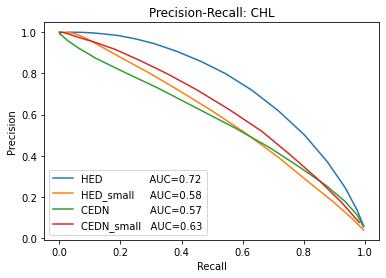

In [26]:
#plot precision vs recall
plt.plot(hed_se,hed_pr,label='HED               AUC='+str(round(auc(hed_se,hed_pr),2)))
plt.plot(hed_small_se,hed_small_pr,label='HED_small     AUC='+str(round(auc(hed_small_se,hed_small_pr),2)))
plt.plot(cedn_se,cedn_pr,label='CEDN             AUC='+str(round(auc(cedn_se,cedn_pr),2)))
plt.plot(cedn_small_se,cedn_small_pr,label='CEDN_small   AUC='+str(round(auc(cedn_small_se,cedn_small_pr),2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall: CHL")
plt.legend()

In [43]:
#find max f-score
print('HED: ', max(hed_fs))
print('HED_small: ', max(hed_small_fs))
print('CEDN: ', max(cedn_fs))
print('CEDN_small: ', max(cedn_small_fs))

HED:  0.4613472105586818
HED_small:  0.46355502721641745
CEDN:  0.3487495775599865
CEDN_small:  0.4673660122449653


In [45]:
#find best threshold (threshold=idx*0.05+0.05), then binary metrics at that threshold
hed_idx = np.argmax(hed_fs)
print(hed_idx)
print('HED: ', hed_ac[hed_idx],hed_pr[hed_idx],hed_sp[hed_idx],hed_se[hed_idx])
hed_small_idx = np.argmax(hed_small_fs)
print(hed_small_idx)
print('HED_small: ', hed_small_ac[hed_small_idx],hed_small_pr[hed_small_idx],hed_small_sp[hed_small_idx],hed_small_se[hed_small_idx])
cedn_idx = np.argmax(cedn_fs)
print(cedn_idx)
print('CEDN: ', cedn_ac[cedn_idx],cedn_pr[cedn_idx],cedn_sp[cedn_idx],cedn_se[cedn_idx])
cedn_small_idx = np.argmax(cedn_small_fs)
print(cedn_small_idx)
print('CEDN_small: ', cedn_small_ac[cedn_small_idx],cedn_small_pr[cedn_small_idx],cedn_small_sp[cedn_small_idx],cedn_small_se[cedn_small_idx])

5
HED:  0.9647064073591393 0.43878295431676395 0.9800484624853949 0.4863579962914941
5
HED_small:  0.962852498336291 0.4204737636629854 0.9771692417485666 0.5164721792351555
4
CEDN:  0.9332072842724046 0.25018031067984703 0.9446804172298936 0.5754876127539141
5
CEDN_small:  0.958048971966504 0.38597336046955355 0.9697809261351772 0.59225953964337
